## Team Data_Deciphers

### Time Series Forecasting (with original dataset)

In [1]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

import statsmodels.graphics.tsaplots as tsa
import statsmodels.tsa.stattools as ts

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data
data_sales=pd.read_csv('Training-Data-Sets.csv', index_col=0) 

In [3]:
# doing some sanity check ok data
data_sales.head()

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
Day,,,,,,,,,,,,,,,,,,,,,
1,718.458667,22256928,56812,7724107,238700,151438,1044,112229070,2133614,5,...,54.17,16.46,105.71,36.13,46.36,71.83,5420048,475559,0.3766,45.77
2,25.521137,4239408,105695,5844288,188902,264008,113582,284597324,1719318,38,...,65.79,15.64,111.79,43.31,47.58,67.90,12155631,371540,0.2515,35.02
3,268.288044,6708500,87686,13008485,19704,150505,38501,807781054,1569740,9,...,45.08,23.91,110.15,38.26,49.26,72.70,11939870,225984,0.3679,46.22
4,209.071599,36835247,70791,2520814,200111,253458,53719,667441334,922723,9,...,75.24,13.06,116.74,39.37,44.21,73.01,7045541,551342,0.0504,38.10
5,3482.169185,23693467,75610,9276779,65532,278877,95178,74045467,1834970,26,...,56.85,40.72,115.18,36.85,45.46,75.84,11488805,254143,0.2219,39.16


In [4]:
# we have to forecast data for 28 days period, we have given data on daily basis, so aggregating data for 28 days
train_grouped = data_sales.groupby(np.arange(len(data_sales)) // 28).mean()
train_grouped.head()

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,667.858556,1.769089e+07,75855.928571,6.349730e+06,199714.321429,207294.071429,106157.750000,3.699968e+08,1.910145e+06,22.357143,...,51.130357,29.811071,107.341429,38.613929,45.584643,70.815714,7.156285e+06,511652.464286,0.233807,39.577857
1,277.717426,1.557197e+07,60078.857143,6.647341e+06,201148.107143,205014.750000,97501.678571,4.518553e+08,1.792867e+06,27.750000,...,51.773929,28.815000,104.888929,37.431429,46.185357,69.854286,7.155017e+06,526414.464286,0.218829,40.216071
2,1083.904871,2.318512e+07,70334.857143,6.204214e+06,212023.464286,203763.178571,119702.392857,5.777184e+08,1.992896e+06,24.571429,...,52.857500,31.518929,104.847143,39.231071,46.289286,70.239286,6.219402e+06,493792.357143,0.233504,41.722500
3,597.319170,1.870334e+07,66125.464286,7.125146e+06,191658.392857,205844.357143,110357.464286,4.228509e+08,2.050156e+06,29.464286,...,47.435357,28.932500,109.611429,38.054643,46.428929,69.806786,6.173164e+06,558087.892857,0.226993,41.577857
4,1269.848862,2.087961e+07,58869.464286,5.672213e+06,207559.000000,196776.178571,105472.464286,4.734685e+08,2.088812e+06,24.071429,...,49.931786,27.661786,105.889643,38.928571,46.140714,71.021786,6.840374e+06,585072.857143,0.222521,38.733214


[]

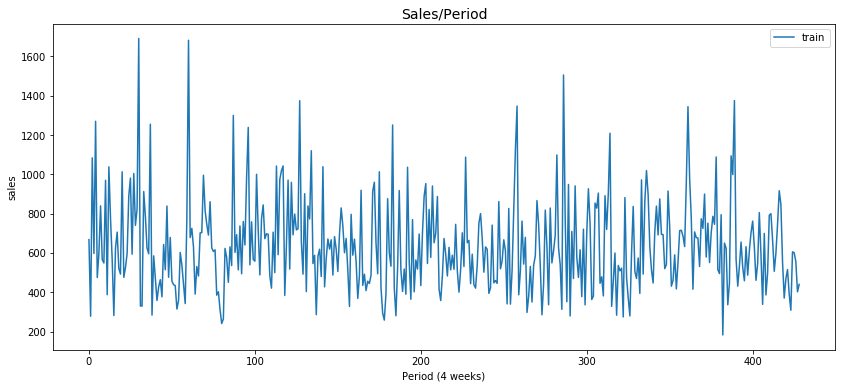

In [5]:
#plt.plot(abc.index, abc['EQ'])
# lets plot the aggregated time series data and check for stationarity of the series

plt.figure(figsize=(14,6))
plt.plot(train_grouped[['EQ']], label='train')
plt.xlabel('Period (4 weeks)')
plt.ylabel('sales')
plt.title('Sales/Period', fontsize=14)
plt.legend(loc='best')
plt.plot()

There is no trend in data and it looks like a pure white noice. 

Let's plot ACF and PACF grapgs to check auto correation lagged values

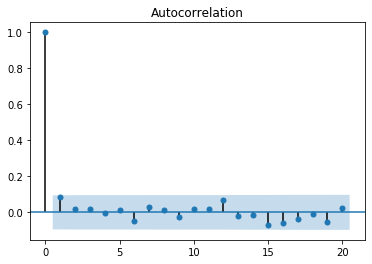

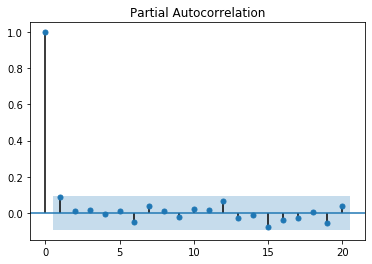

In [6]:
#ACF and PACF
tsa.plot_acf(train_grouped[['EQ']],lags=20)
tsa.plot_pacf(train_grouped[['EQ']],lags=20)
plt.show()

In [7]:
# define p d and q parameters to take any values betweem 0 and 2
p=d=q= range(0,2)

# generate all the different combinations of P,D, and Q

pdq=list(itertools.product(p,d,q))

# geberate all the different combinations of seasonality p,d and q triplets

seasonal_pdq=[(x[0],x[1],x[2], 13) for x in list(itertools.product(p,d,q))]

print("Example of param components for seasonal ARIMA")
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[3],seasonal_pdq[3]))

Example of param components for seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 13)
SARIMAX: (0, 1, 0) x (0, 1, 0, 13)
SARIMAX: (0, 1, 1) x (0, 1, 1, 13)


In [8]:
train=np.log(train_grouped['EQ'])

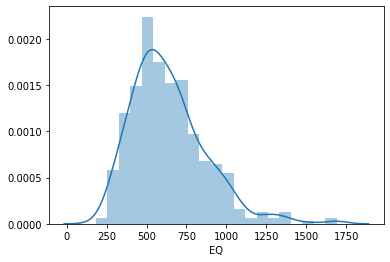

In [9]:
sns.distplot(train_grouped['EQ'])
plt.show()

In [10]:
for param_seasonal in seasonal_pdq:
    print(param_seasonal)

(0, 0, 0, 13)
(0, 0, 1, 13)
(0, 1, 0, 13)
(0, 1, 1, 13)
(1, 0, 0, 13)
(1, 0, 1, 13)
(1, 1, 0, 13)
(1, 1, 1, 13)


In [11]:

# iteration of all the combinations of p, d and q

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(train,
                                         order=param,
                                         seasonal_order=param_seasonal,
                                         enforce_stationarity= False,
                                         enforce_invertibility=False)
            results= mod.fit()
            
            print("ARIMA{} x {}13 - AIC:{} - BIC:{}".format(param,param_seasonal,round(results.aic,4),round(results.bic,4)))
        except :
            continue

ARIMA(0, 0, 0) x (0, 0, 0, 13)13 - AIC:2806.0601 - BIC:2810.1192
ARIMA(0, 0, 0) x (0, 0, 1, 13)13 - AIC:2238.5528 - BIC:2246.6094
ARIMA(0, 0, 0) x (0, 1, 0, 13)13 - AIC:618.0967 - BIC:622.1249
ARIMA(0, 0, 0) x (0, 1, 1, 13)13 - AIC:358.8221 - BIC:366.815
ARIMA(0, 0, 0) x (1, 0, 0, 13)13 - AIC:619.3831 - BIC:627.4445
ARIMA(0, 0, 0) x (1, 0, 1, 13)13 - AIC:381.3469 - BIC:393.4317
ARIMA(0, 0, 0) x (1, 1, 0, 13)13 - AIC:449.1287 - BIC:457.1266
ARIMA(0, 0, 0) x (1, 1, 1, 13)13 - AIC:363.3637 - BIC:375.3531
ARIMA(0, 0, 1) x (0, 0, 0, 13)13 - AIC:2272.9517 - BIC:2281.0653
ARIMA(0, 0, 1) x (0, 0, 1, 13)13 - AIC:1865.0049 - BIC:1877.0825
ARIMA(0, 0, 1) x (0, 1, 0, 13)13 - AIC:615.7015 - BIC:623.7533
ARIMA(0, 0, 1) x (0, 1, 1, 13)13 - AIC:352.975 - BIC:364.9569
ARIMA(0, 0, 1) x (1, 0, 0, 13)13 - AIC:619.298 - BIC:631.39
ARIMA(0, 0, 1) x (1, 0, 1, 13)13 - AIC:627.7737 - BIC:643.8771
ARIMA(0, 0, 1) x (1, 1, 0, 13)13 - AIC:447.4905 - BIC:459.4873
ARIMA(0, 0, 1) x (1, 1, 1, 13)13 - AIC:356.4625 - BI

In [12]:
# by using best P D Q values for order and seasonal order, building the final forcast model
arima_model_train = sm.tsa.statespace.SARIMAX(train,
                                             order=(3,2,1),
                                             seasonal_order= (2, 2, 2, 13),
                                              enforce_stationarity= False,
                                         enforce_invertibility=False)
results_arima_train= arima_model_train.fit()

print(results_arima_train.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6241      0.056    -11.109      0.000      -0.734      -0.514
ar.L2         -0.4058      0.070     -5.789      0.000      -0.543      -0.268
ar.L3         -0.1998      0.055     -3.618      0.000      -0.308      -0.092
ma.L1         -1.0000    132.365     -0.008      0.994    -260.431     258.431
ar.S.L13      -0.8305      0.147     -5.659      0.000      -1.118      -0.543
ar.S.L26      -0.3655      0.084     -4.368      0.000      -0.529      -0.201
ma.S.L13      -0.8620    873.771     -0.001      0.999   -1713.422    1711.698
ma.S.L26      -0.1380    120.560     -0.001      0.999    -236.431     236.155
sigma2         0.1972    168.880      0.001      0.999    -330.802     331.196


In [13]:
# predict value based on ARIMA model

pred_arima_train = results_arima_train.get_prediction(dynamic=False)
pred_arima_train_ci = pred_arima_train.conf_int()

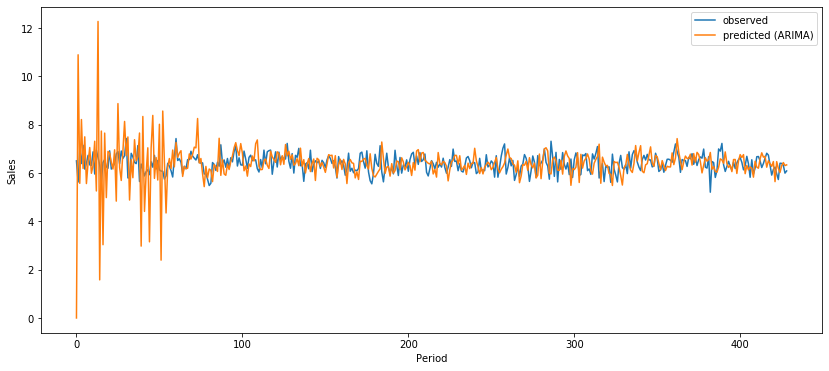

In [14]:
# plotting actual vs predicted

plt.figure(figsize=(14,6))
plot1=train.plot(label='observed')
pred_arima_train.predicted_mean.plot(ax=plot1,label='predicted (ARIMA)')


plt.xlabel('Period')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.show()

Lets check the stationarity of the residual series

### Stationarity tests

In [15]:
residual = pred_arima_train.predicted_mean- train

In [16]:
# Augmented Dickey-Fuller test
import statsmodels.tsa.stattools as ts
residual1= residual [~residual.isnull()]

adf_test= ts.adfuller(residual1,autolag='AIC')

print('ADF Statistic: %f' % adf_test[0])
print('P-value : %f'% adf_test[1])
print('Critical Values : ')

for key, values in adf_test[4].items():
    print('\t%s: %.3f' % (key, values))

ADF Statistic: -6.890315
P-value : 0.000000
Critical Values : 
	1%: -3.446
	5%: -2.869
	10%: -2.571


Test statistc is less than Critical values so we can conclude that residual series is stationary or pure white noise.
p-value obtained by the ADF test is less than 0.05 so the residual series is pure white noice.

In [17]:
#KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test
kpss_test= ts.kpss(residual1,regression='c', store=False)

print('KPSS Statistic: %f' % kpss_test[0])
print('P-value : %f'% kpss_test[1])
print('Critical Values : ')

for key, values in kpss_test[3].items():
    print('\t%s: %.3f' % (key, values))

KPSS Statistic: 0.039351
P-value : 0.100000
Critical Values : 
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


Test statistc is less than Critical values so we can conclude that residual series is stationary or pure white noice.
p-value obtained by the ADF test is less than 0.05 so the residual series is pure white noice.

In [18]:
# Calcualte MAPE on train data
arima_pred_train= np.exp(pred_arima_train.predicted_mean)
n= len(arima_pred_train)
total=0
for i in range(n):
    total=total+np.absolute((100*(np.exp(train.iloc[i]) - arima_pred_train.iloc[i])/np.exp(train.iloc[i])))
    
MAPE=total/n
print("MAPE Value :  {}".format(round(MAPE,4)))

MAPE Value :  168.4953


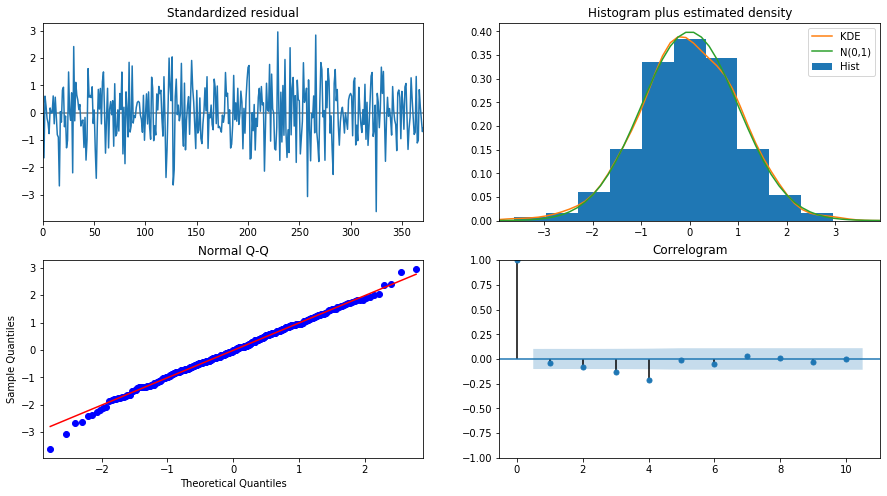

In [19]:
# plotting rge predicted diagnostics
results_arima_train.plot_diagnostics(figsize=(15,8))
plt.show()

In [20]:
# Reading test data, and forecating for 39 time periods
pred_arima = results_arima_train.forecast(steps=39)
test=pd.read_excel('Test dataset v1.xlsx', index_col=0) 


In [21]:
# taking out sales data from test
test_a=test['EQ']
test_a1=test_a.reset_index().drop('Period',1)
pred_arima1=np.exp(pred_arima.reset_index().drop('index',1))

<Figure size 1008x432 with 0 Axes>

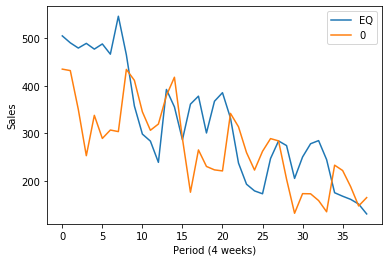

In [22]:
# plotting forecated sales vs Actual sales

plt.figure(figsize=(14,6))
plot1=test_a1.plot(label='observed')
pred_arima1.plot(ax=plot1,label='predicted (ARIMA)')


plt.xlabel('Period (4 weeks)')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.show()

In [23]:
# Calculating MAPE on test
arima_pred_test= pred_arima1[0]
n= len(arima_pred_test)
total=0
for i in range(n):
    total=total+np.absolute((100*(test_a1.iloc[i] - arima_pred_test.iloc[i])/test_a1.iloc[i]))
    
MAPE=total/n
print("MAPE Value :  {}".format(round(MAPE,4)))

MAPE Value :  EQ    26.3445
dtype: float64


In [24]:
print(test_a1.iloc[0] - arima_pred_test.iloc[0])

EQ    69.781075
Name: 0, dtype: float64


In [25]:
# Saving the model :
from sklearn.externals import joblib

# Save the model as a pickle in a file 
joblib.dump(arima_model_train, 'Time_Series_Model_Orig_Data.pkl')


['Time_Series_Model_Orig_Data.pkl']